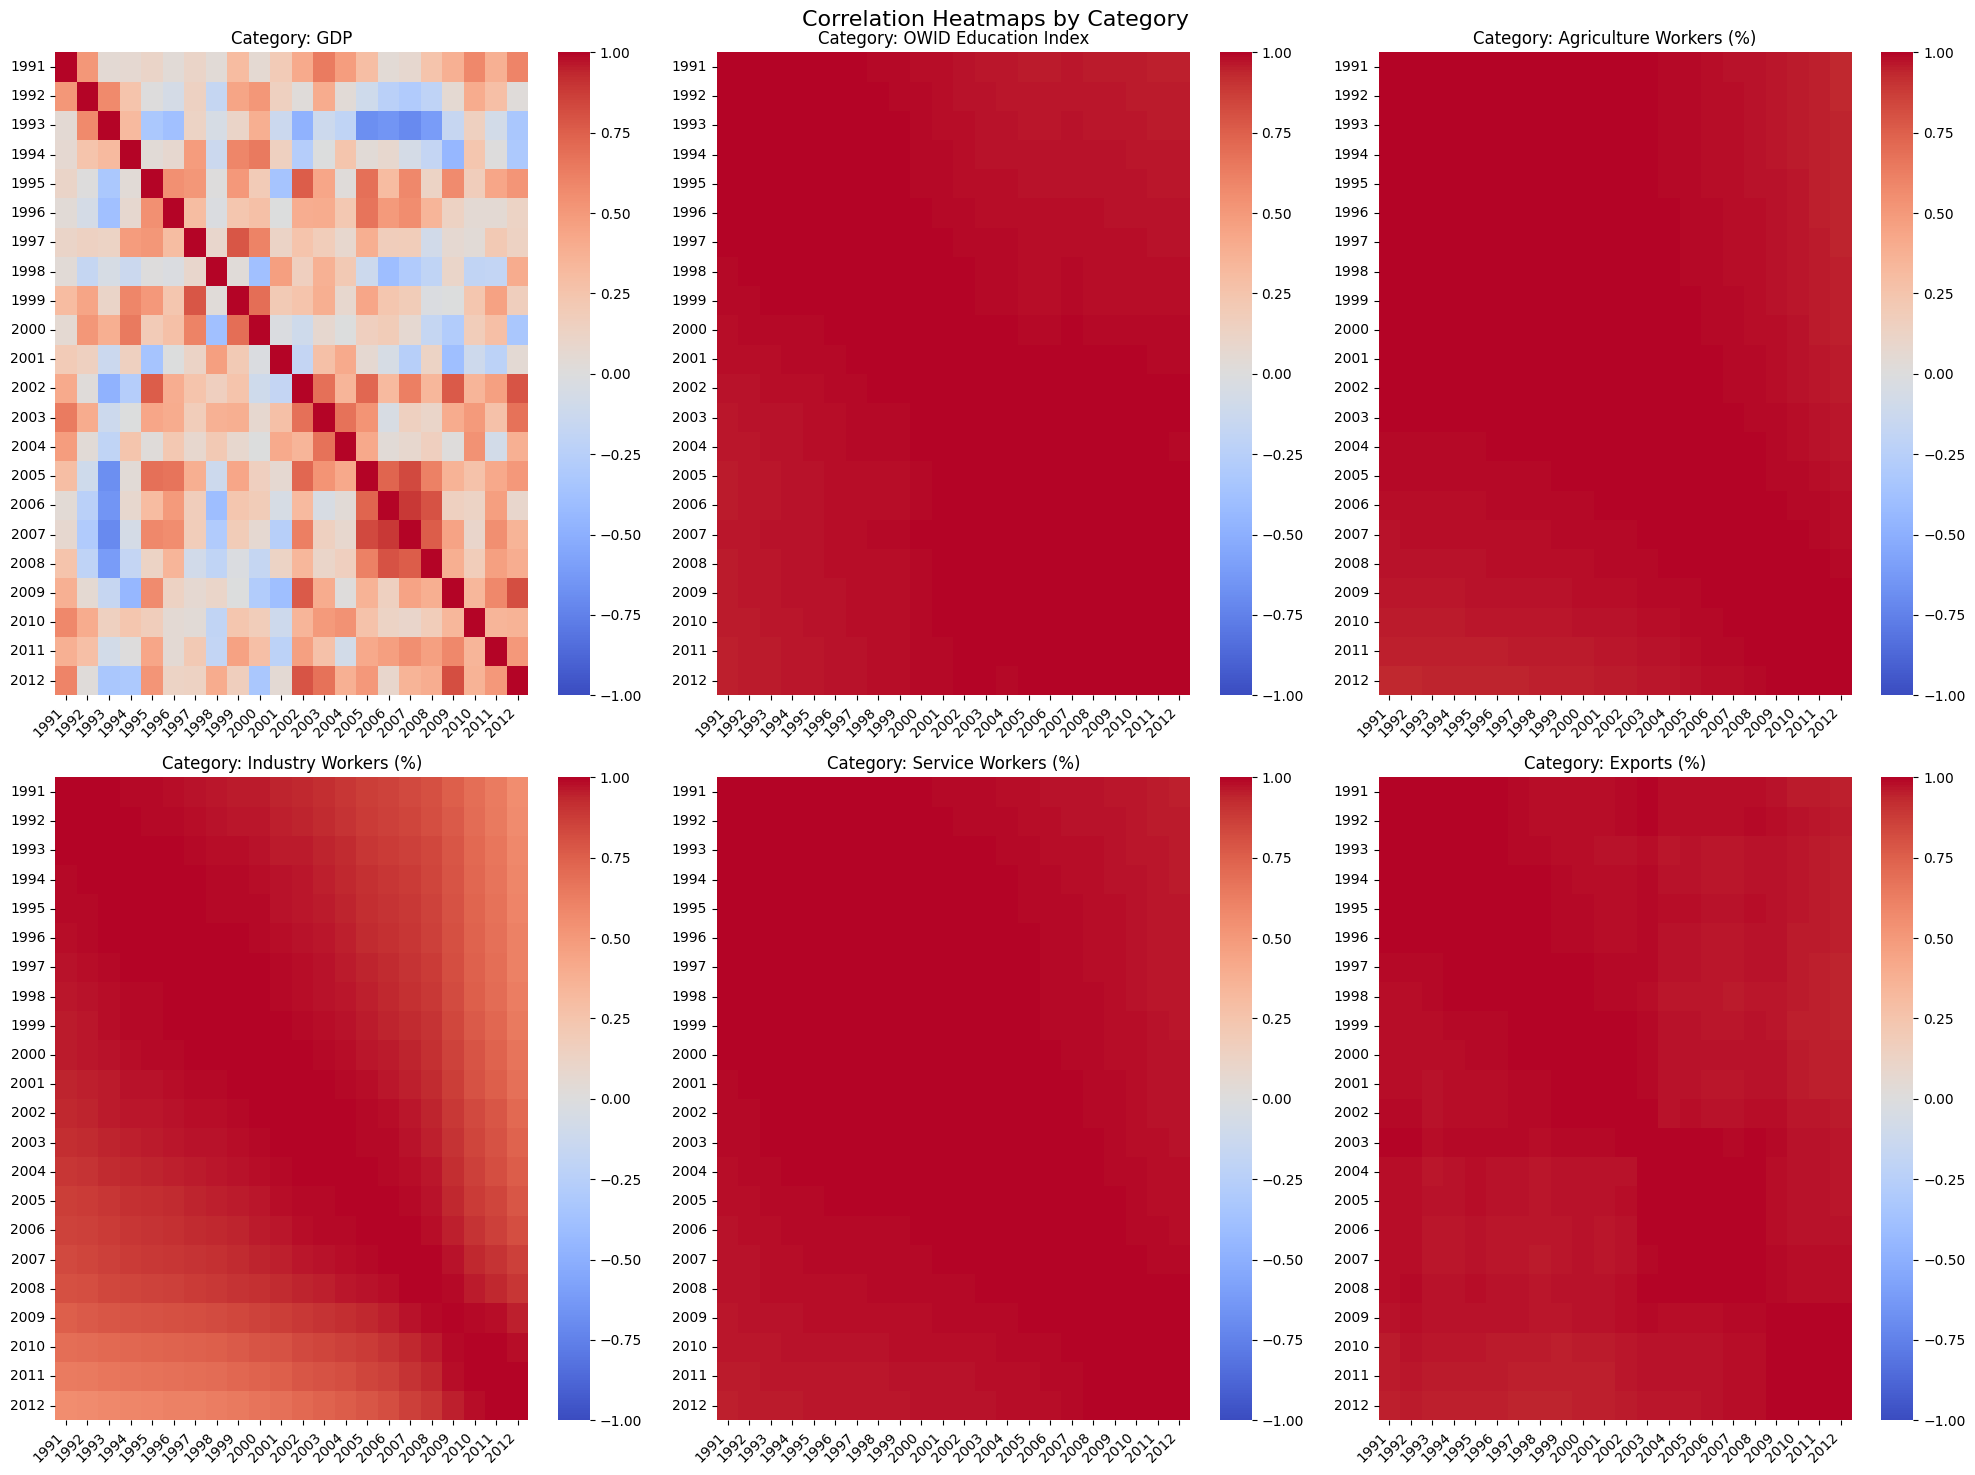

OSError: [Errno 30] Read-only file system: '/correlation_heatmaps.png'

<Figure size 640x480 with 0 Axes>

In [13]:
from __future__ import print_function
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sys

# Our dataset has nonstandard minus signs, so this function is used to handle those
def safe_float(x):
    if isinstance(x, str):
        x = x.replace(u'\u2212', '-').replace(u'\u2013', '-')
    try:
        return float(x)
    except ValueError:
        return np.nan
    
df = pd.read_csv('/Users/pallavi/Desktop/final_data.csv')
column_names = [str(year) for year in range(1991, 2013)]
for col in column_names:
    df[col] = df[col].apply(safe_float)

#Calculate correlations for each category and plot heatmap
def category_correlation(data, cat):
    return data[data['category'] == cat][column_names].corr()
categories = df['category'].unique()
correlations = {cat: category_correlation(df, cat) for cat in categories}
fig, axes = plt.subplots(2, 3, figsize=(20, 15))
fig.suptitle('Correlation Heatmaps by Category', fontsize=16)
axes = axes.flatten()
for i, (cat, corr) in enumerate(correlations.items()):
    if i < len(axes):
        sns.heatmap(corr, ax=axes[i], cmap='coolwarm', vmin=-1, vmax=1, center=0, annot=False)
        axes[i].set_title('Category: {}'.format(cat))
        axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')
        axes[i].set_yticklabels(axes[i].get_yticklabels(), rotation=0)

plt.tight_layout()
plt.show()